In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [3]:
#from datlib.stats import *
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Gross Domestic Product": "FYGDP",
               "Federal Debt: Total Public Debt as Percent of Gross Domestic Product": "GFDEGDQ188S",
              "Federal Surplus or Deficit [-]": "FYFSD"}
# Select start and end dates
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "A")

In [4]:
def bil_to_mil(series):
    return series* 10**3

all of the data sets are related in a few different ways. they all depend on public wealth. and they all depend on the strength of the dollar

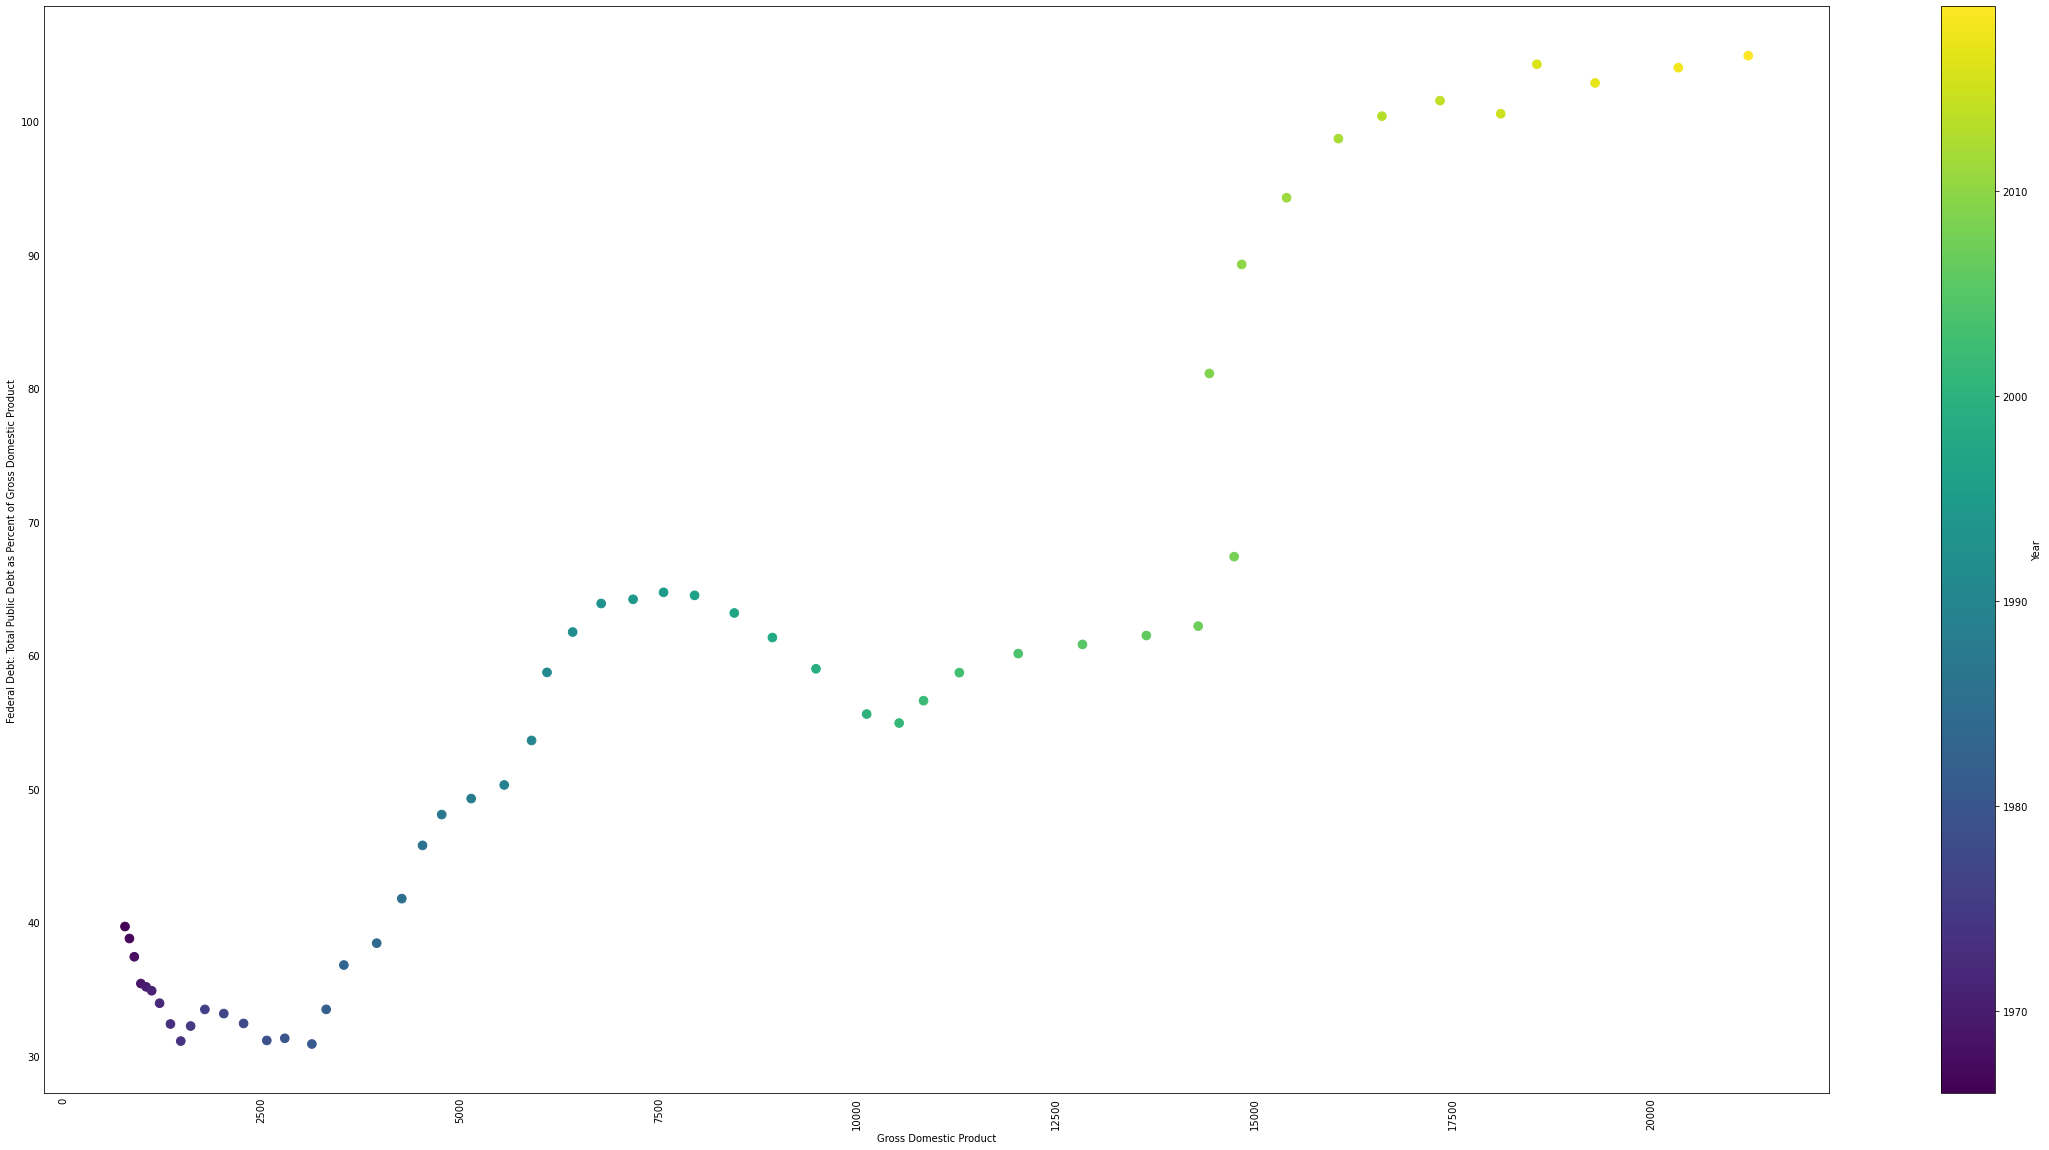

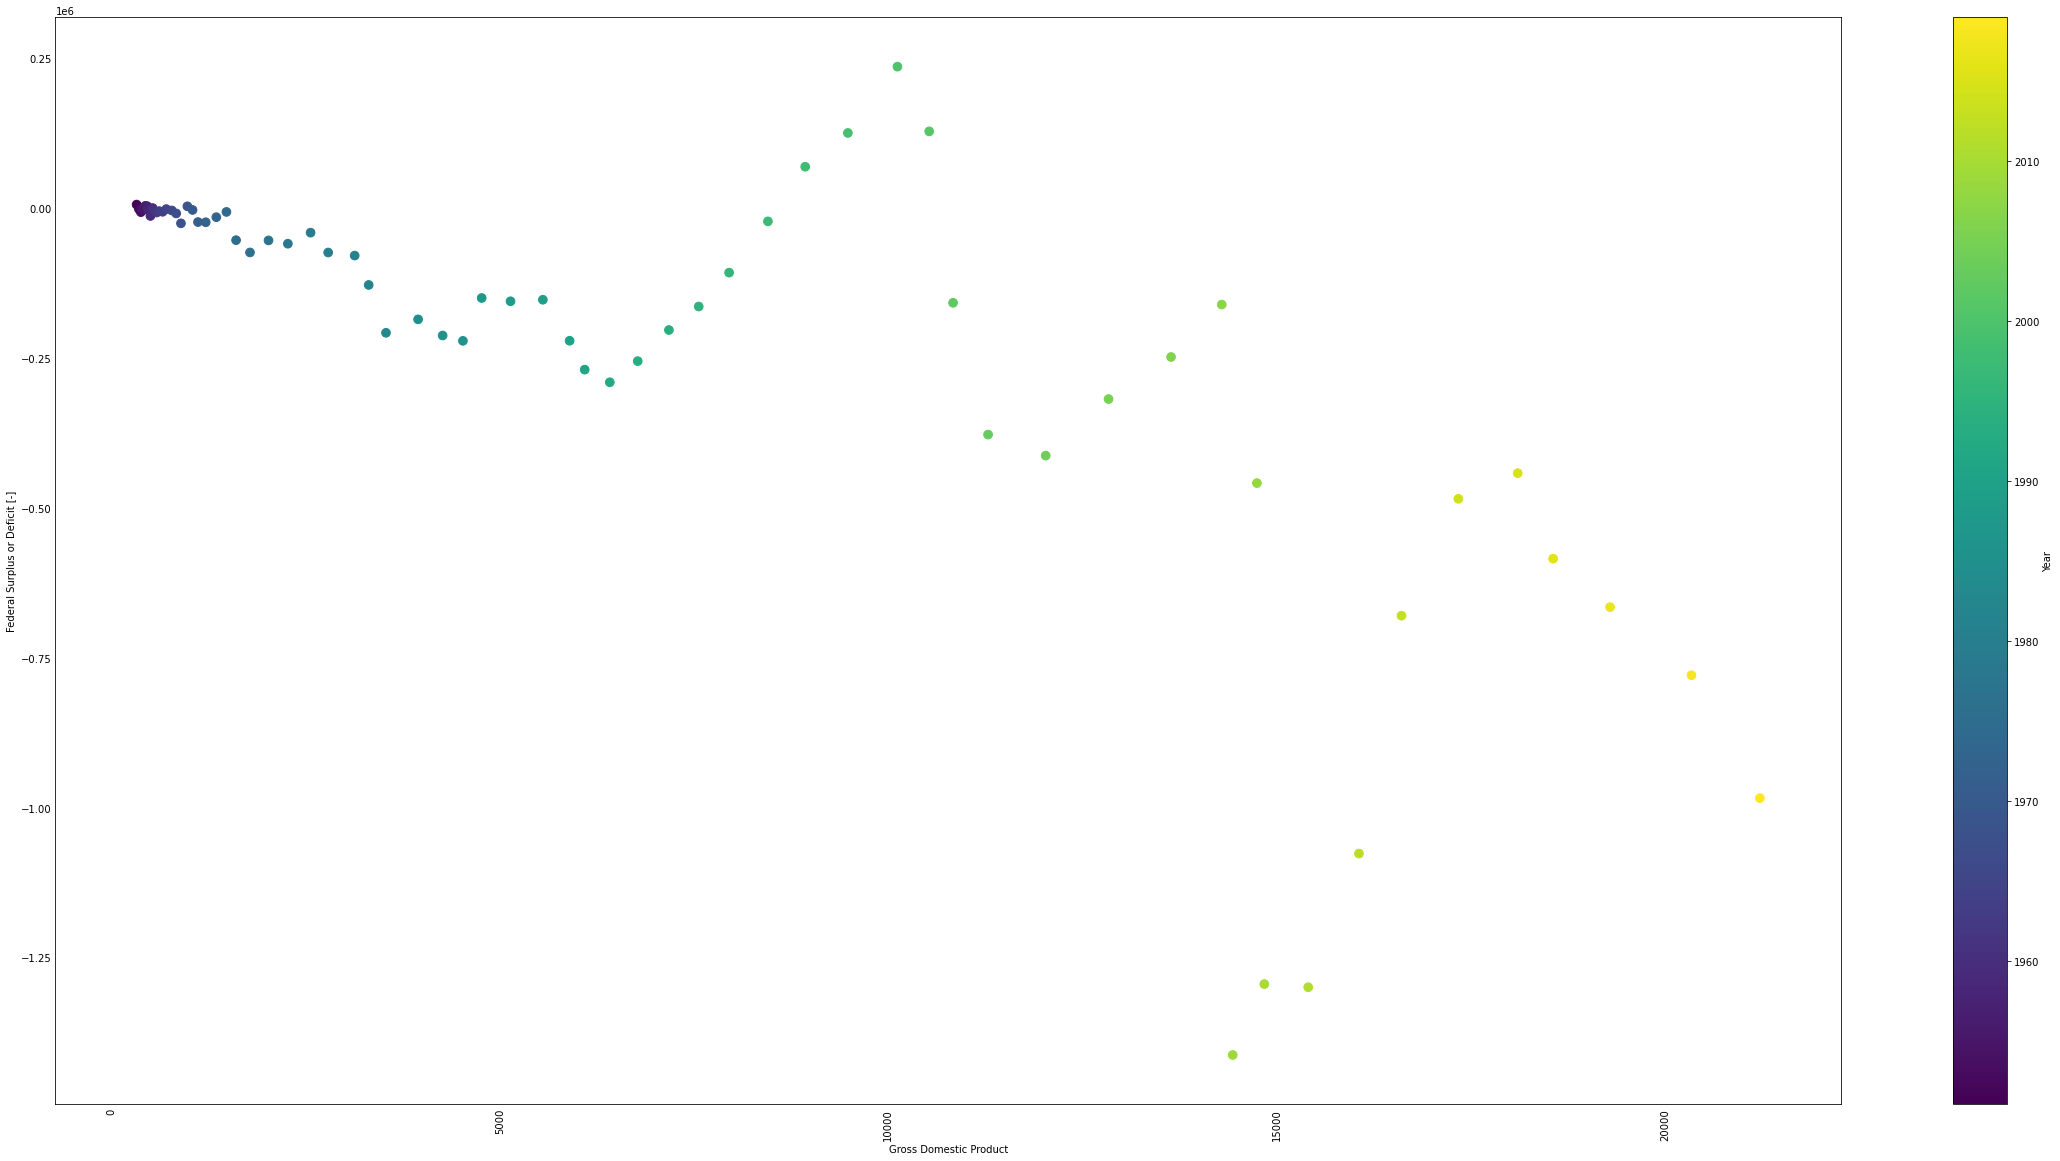

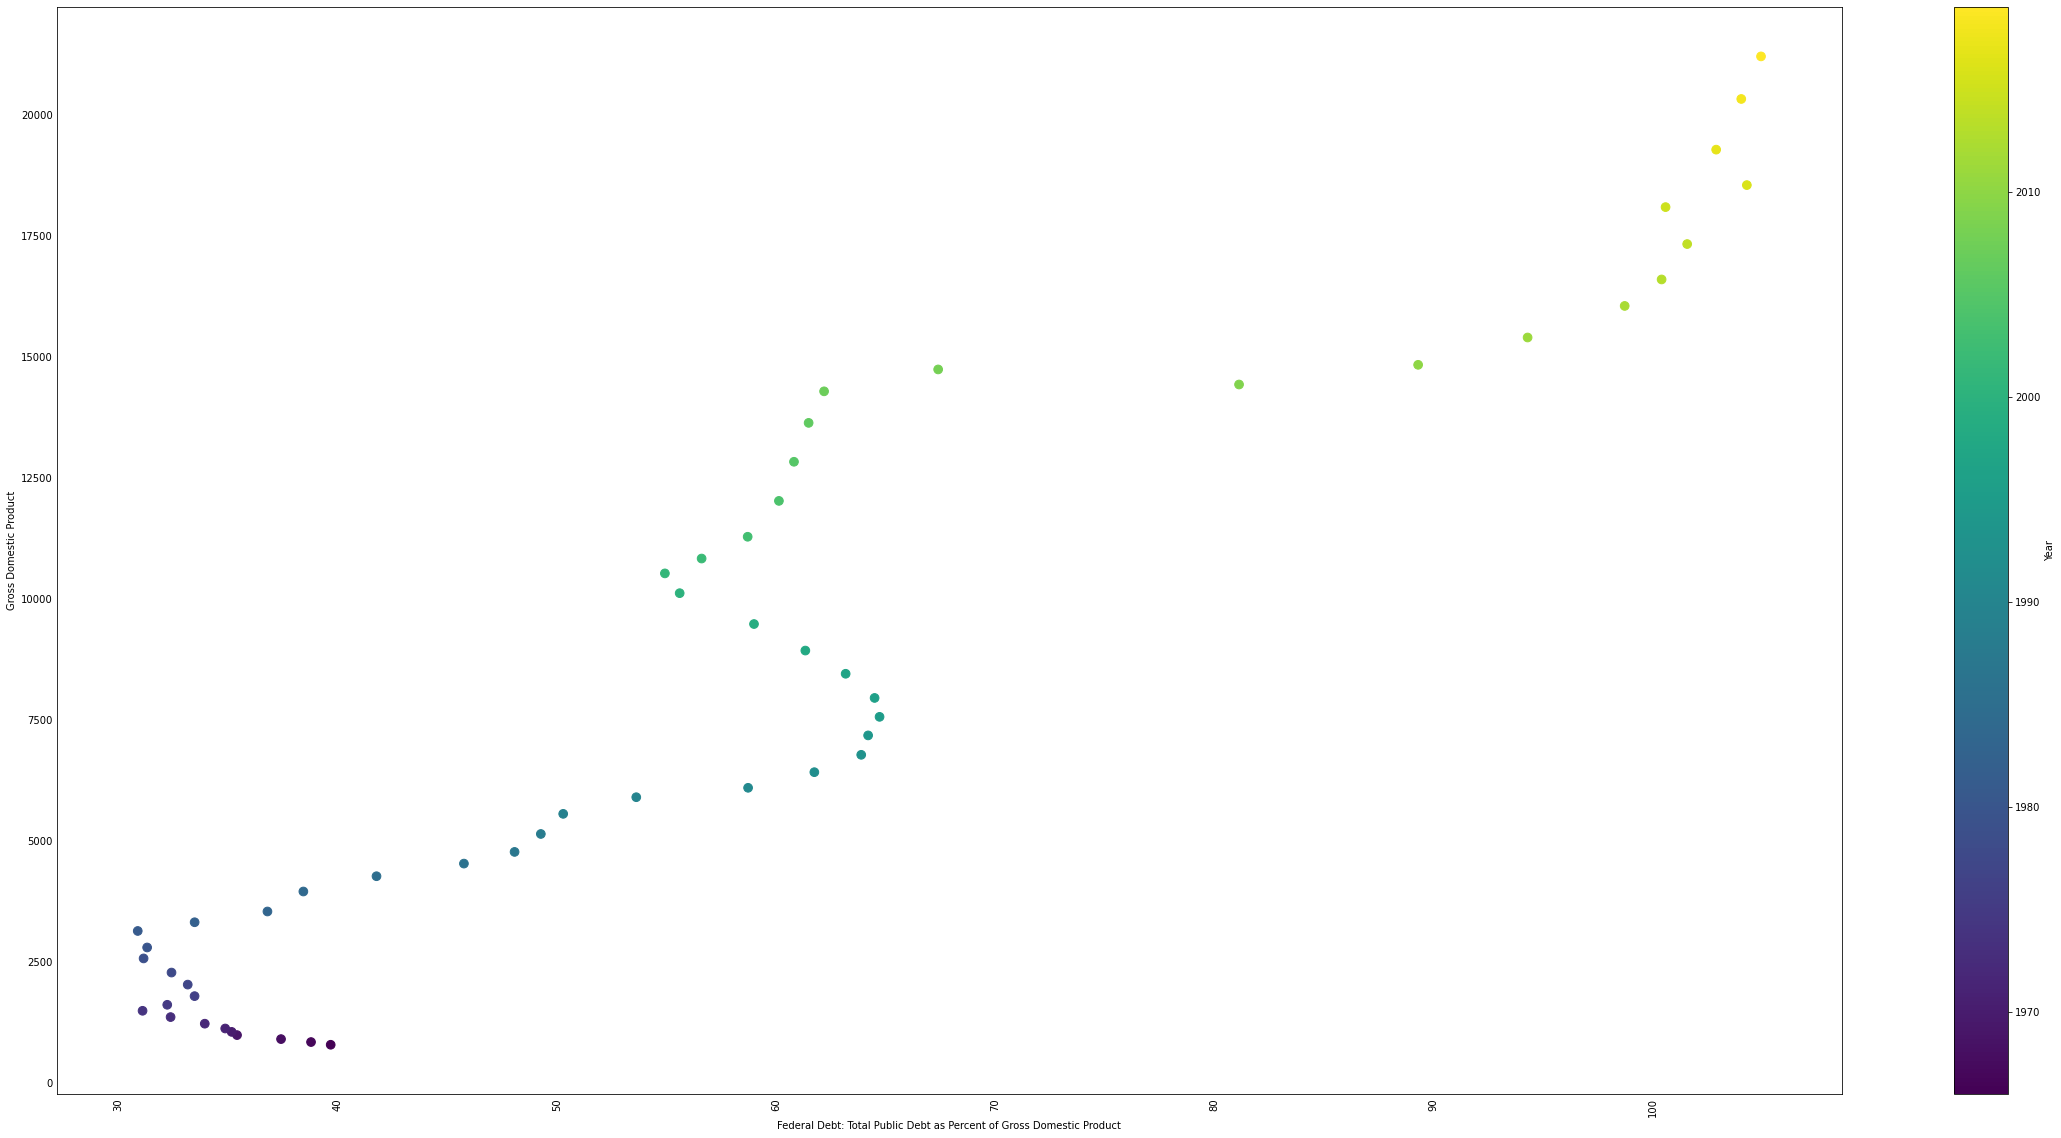

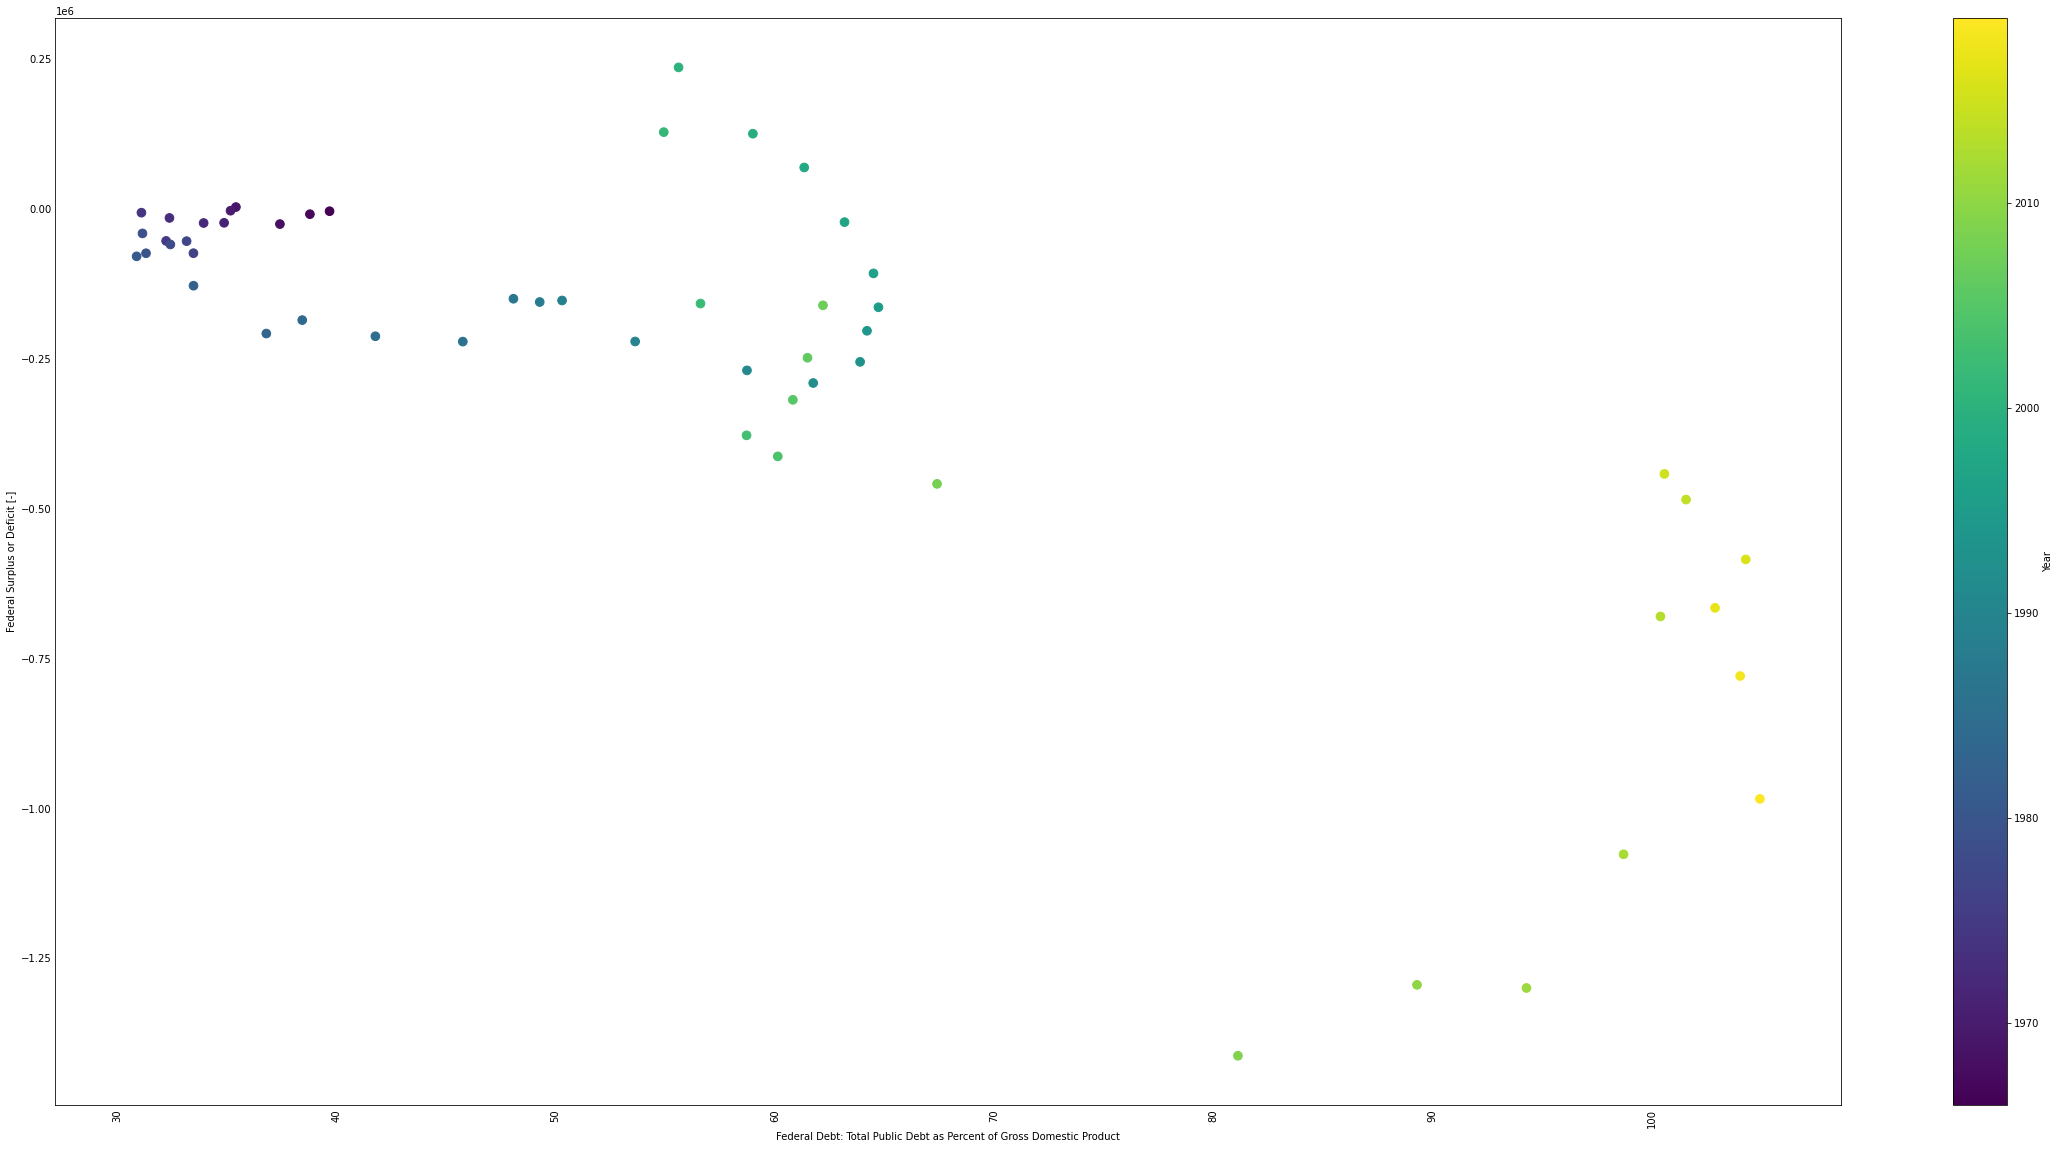

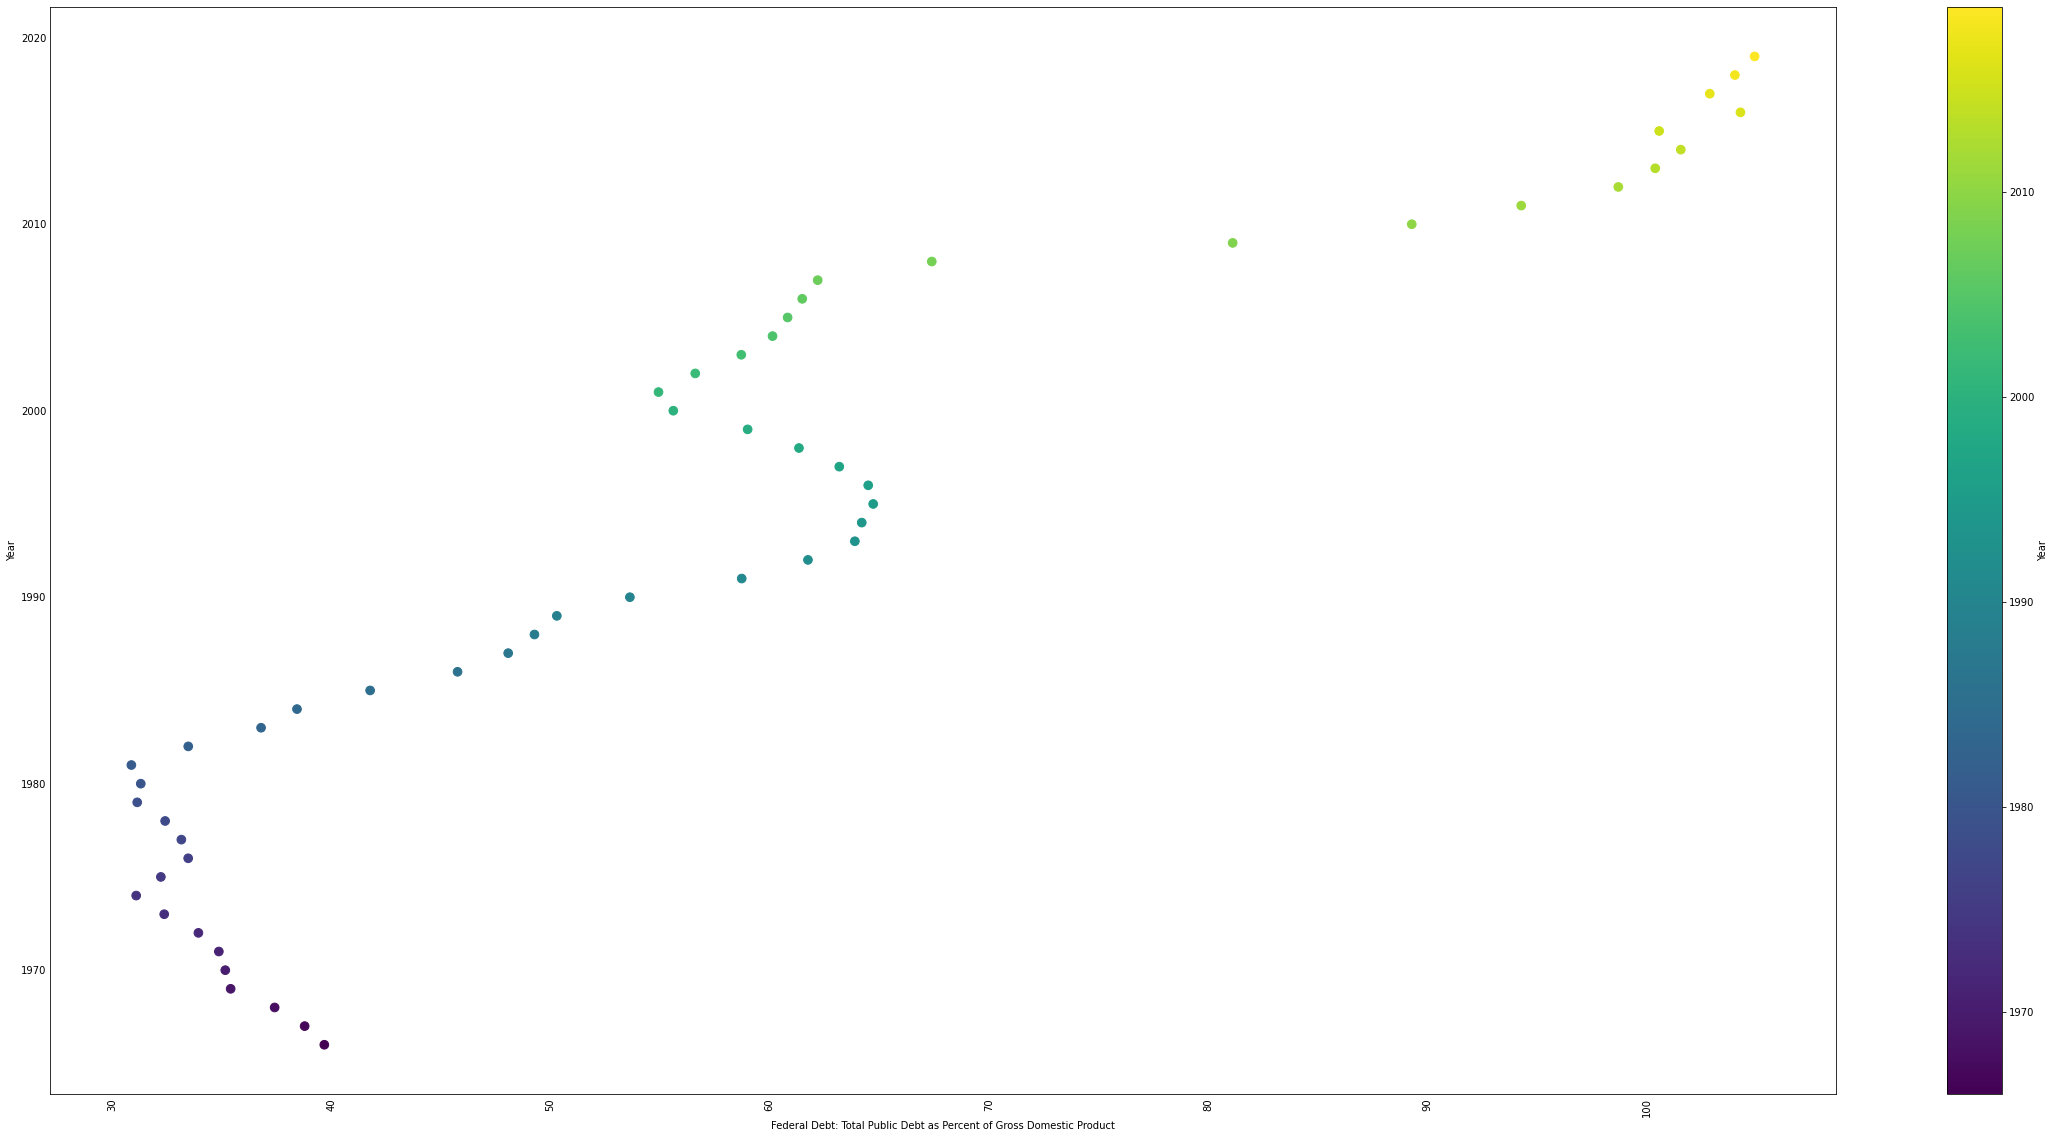

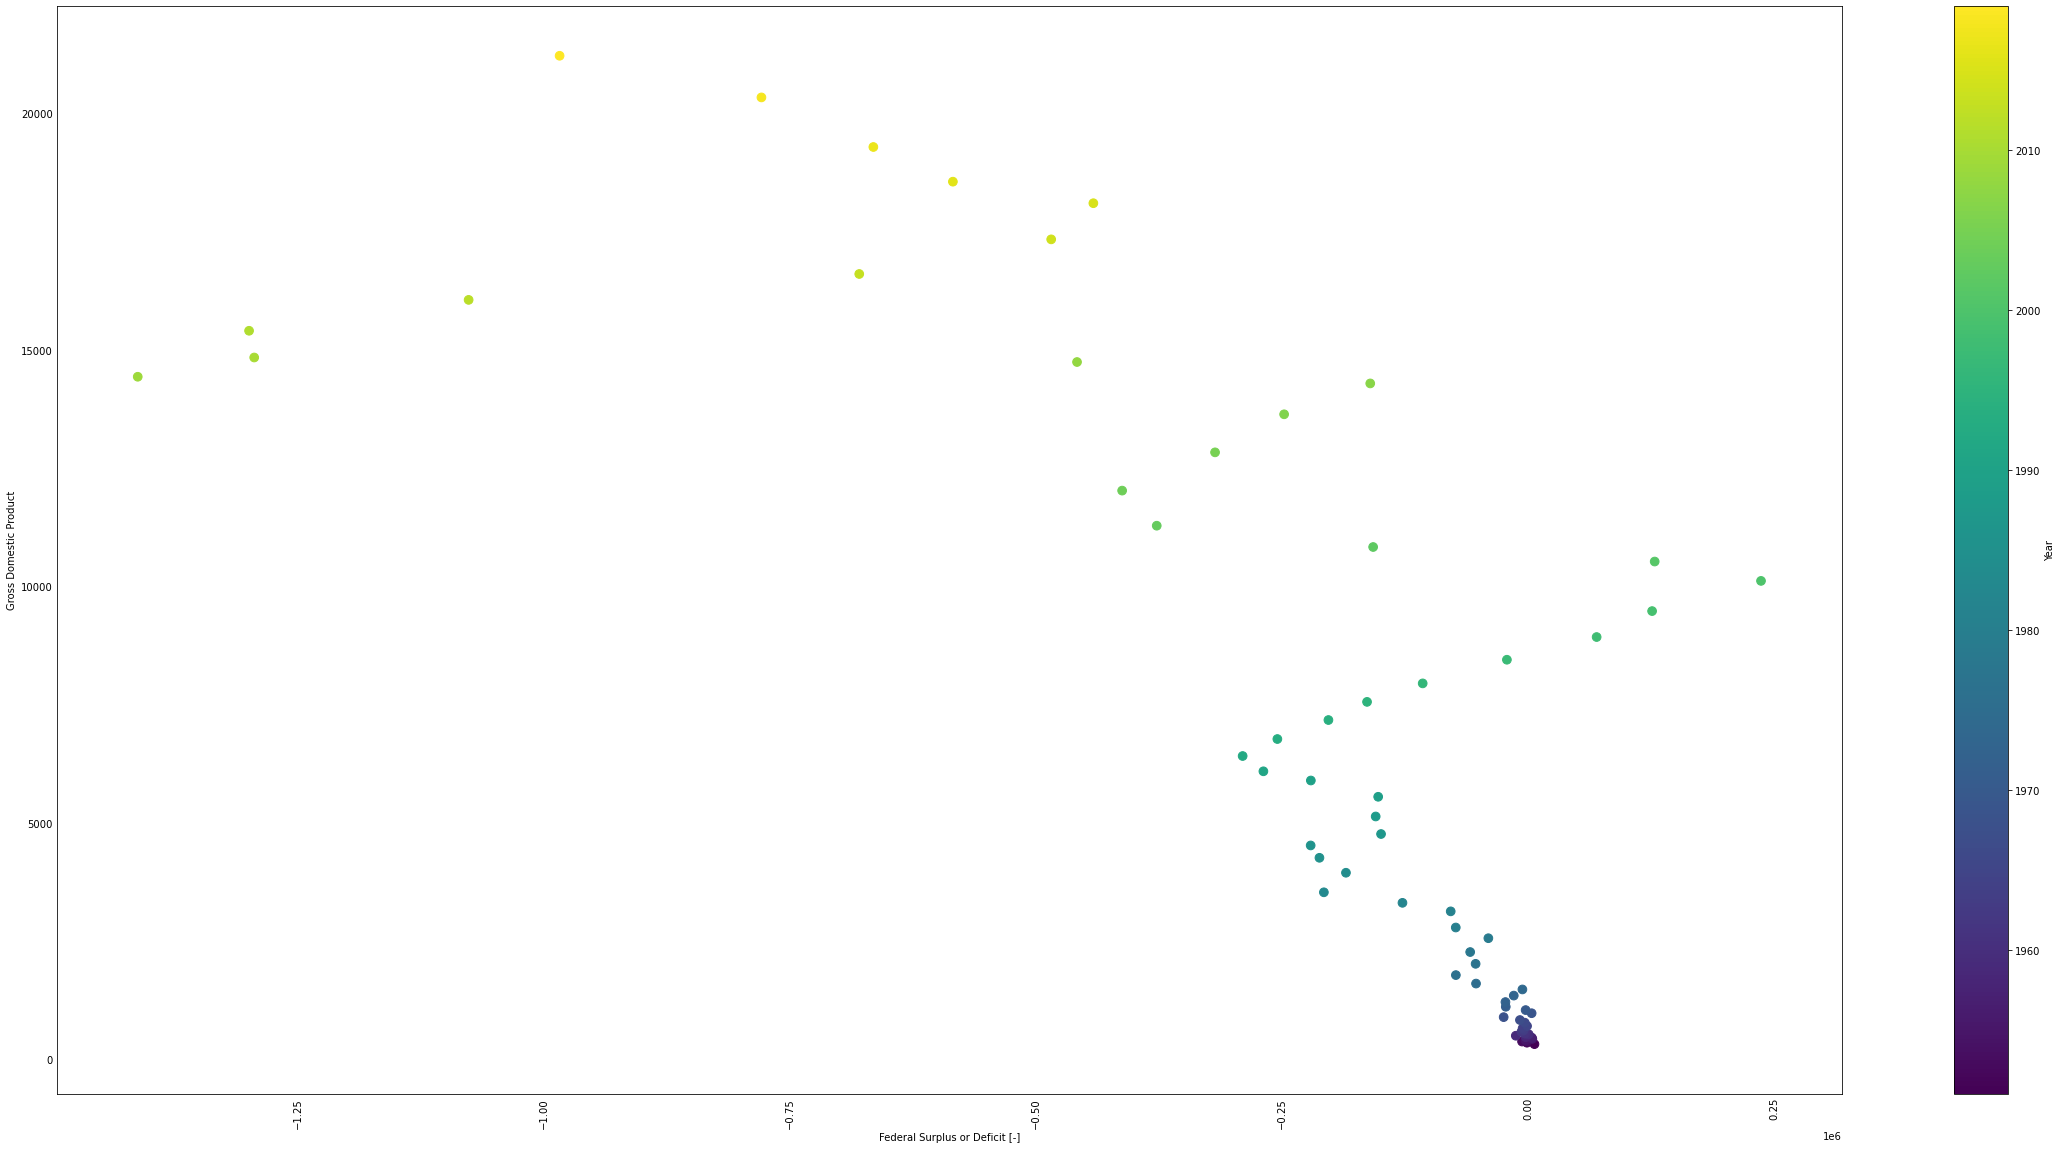

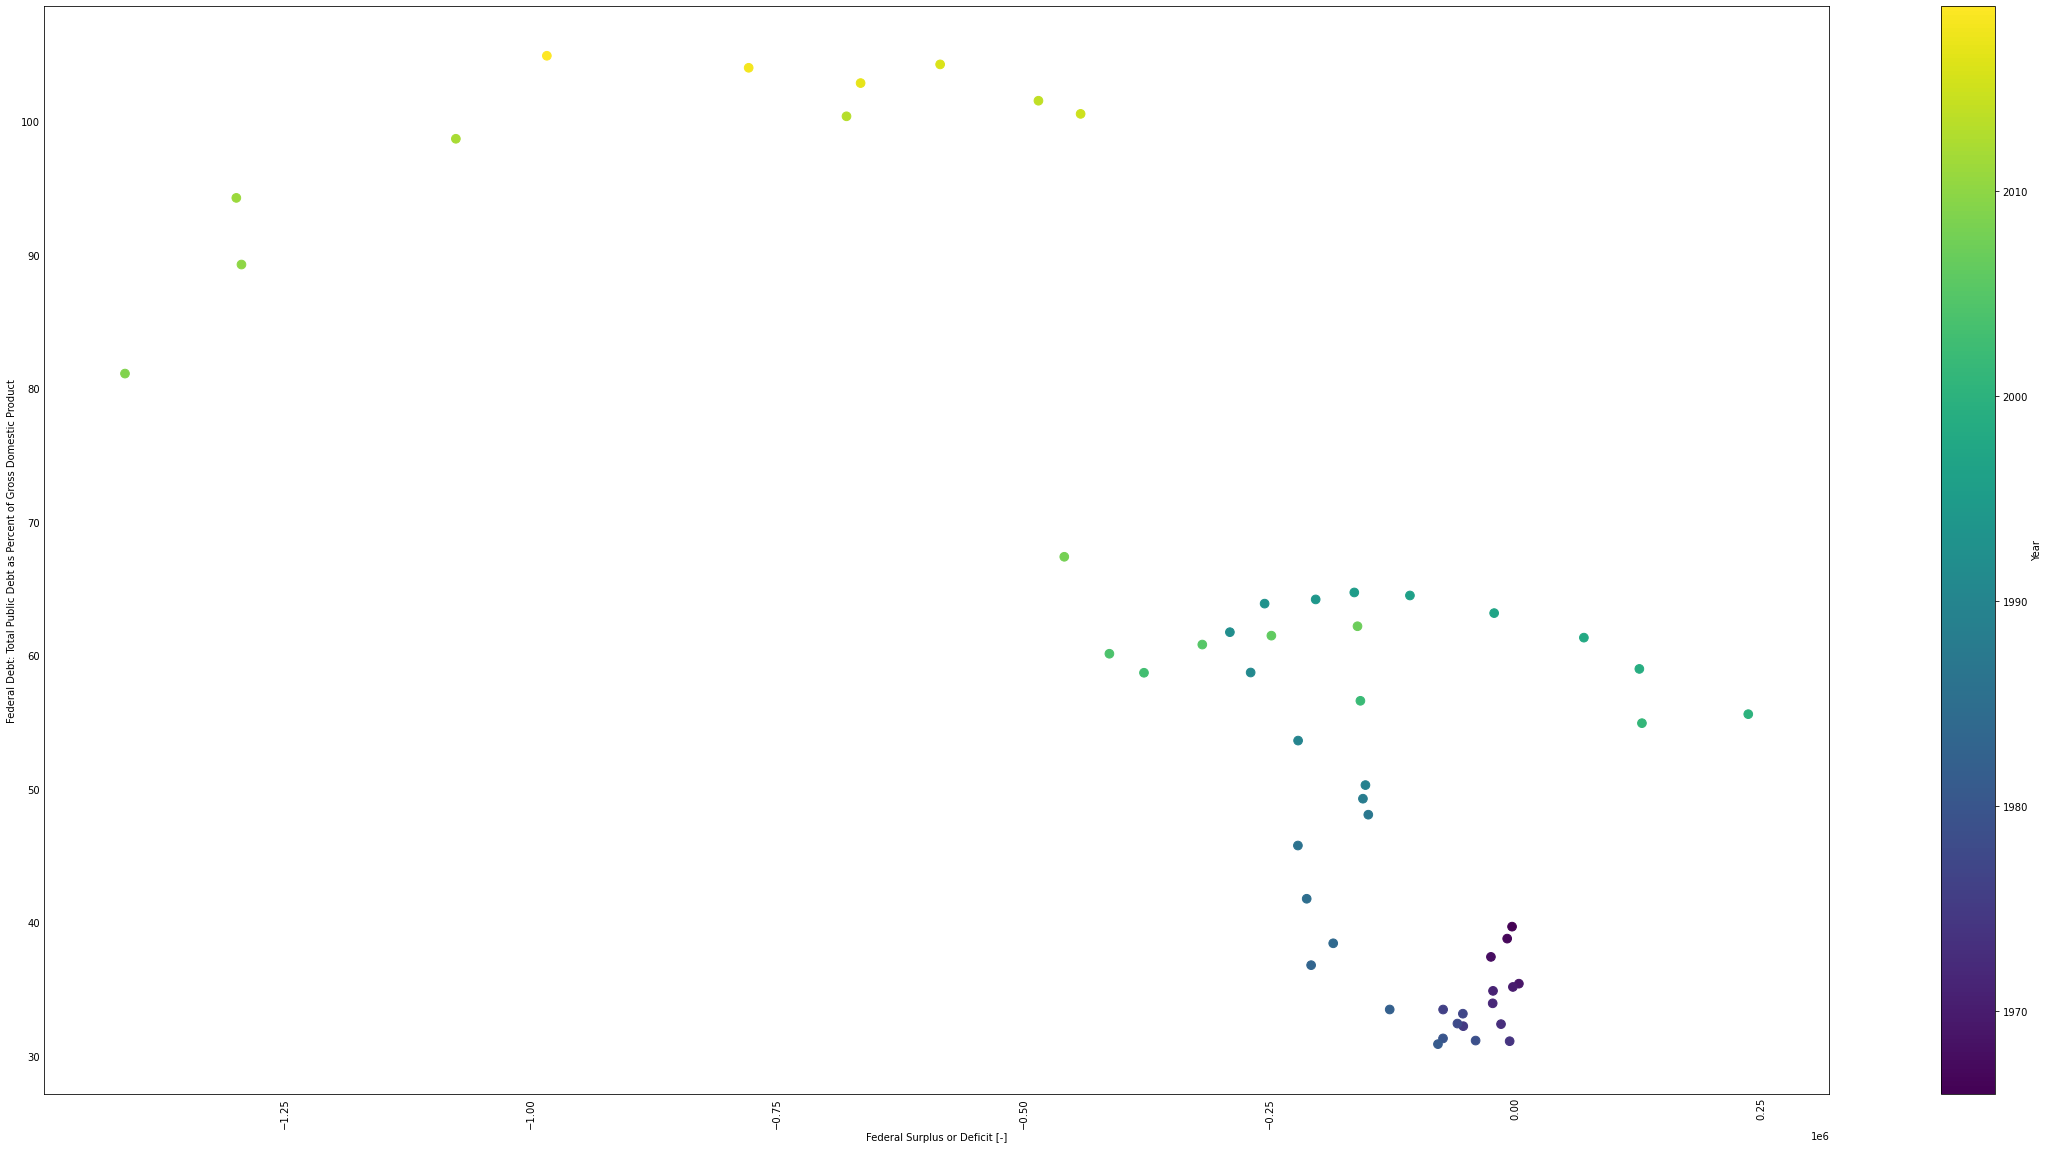

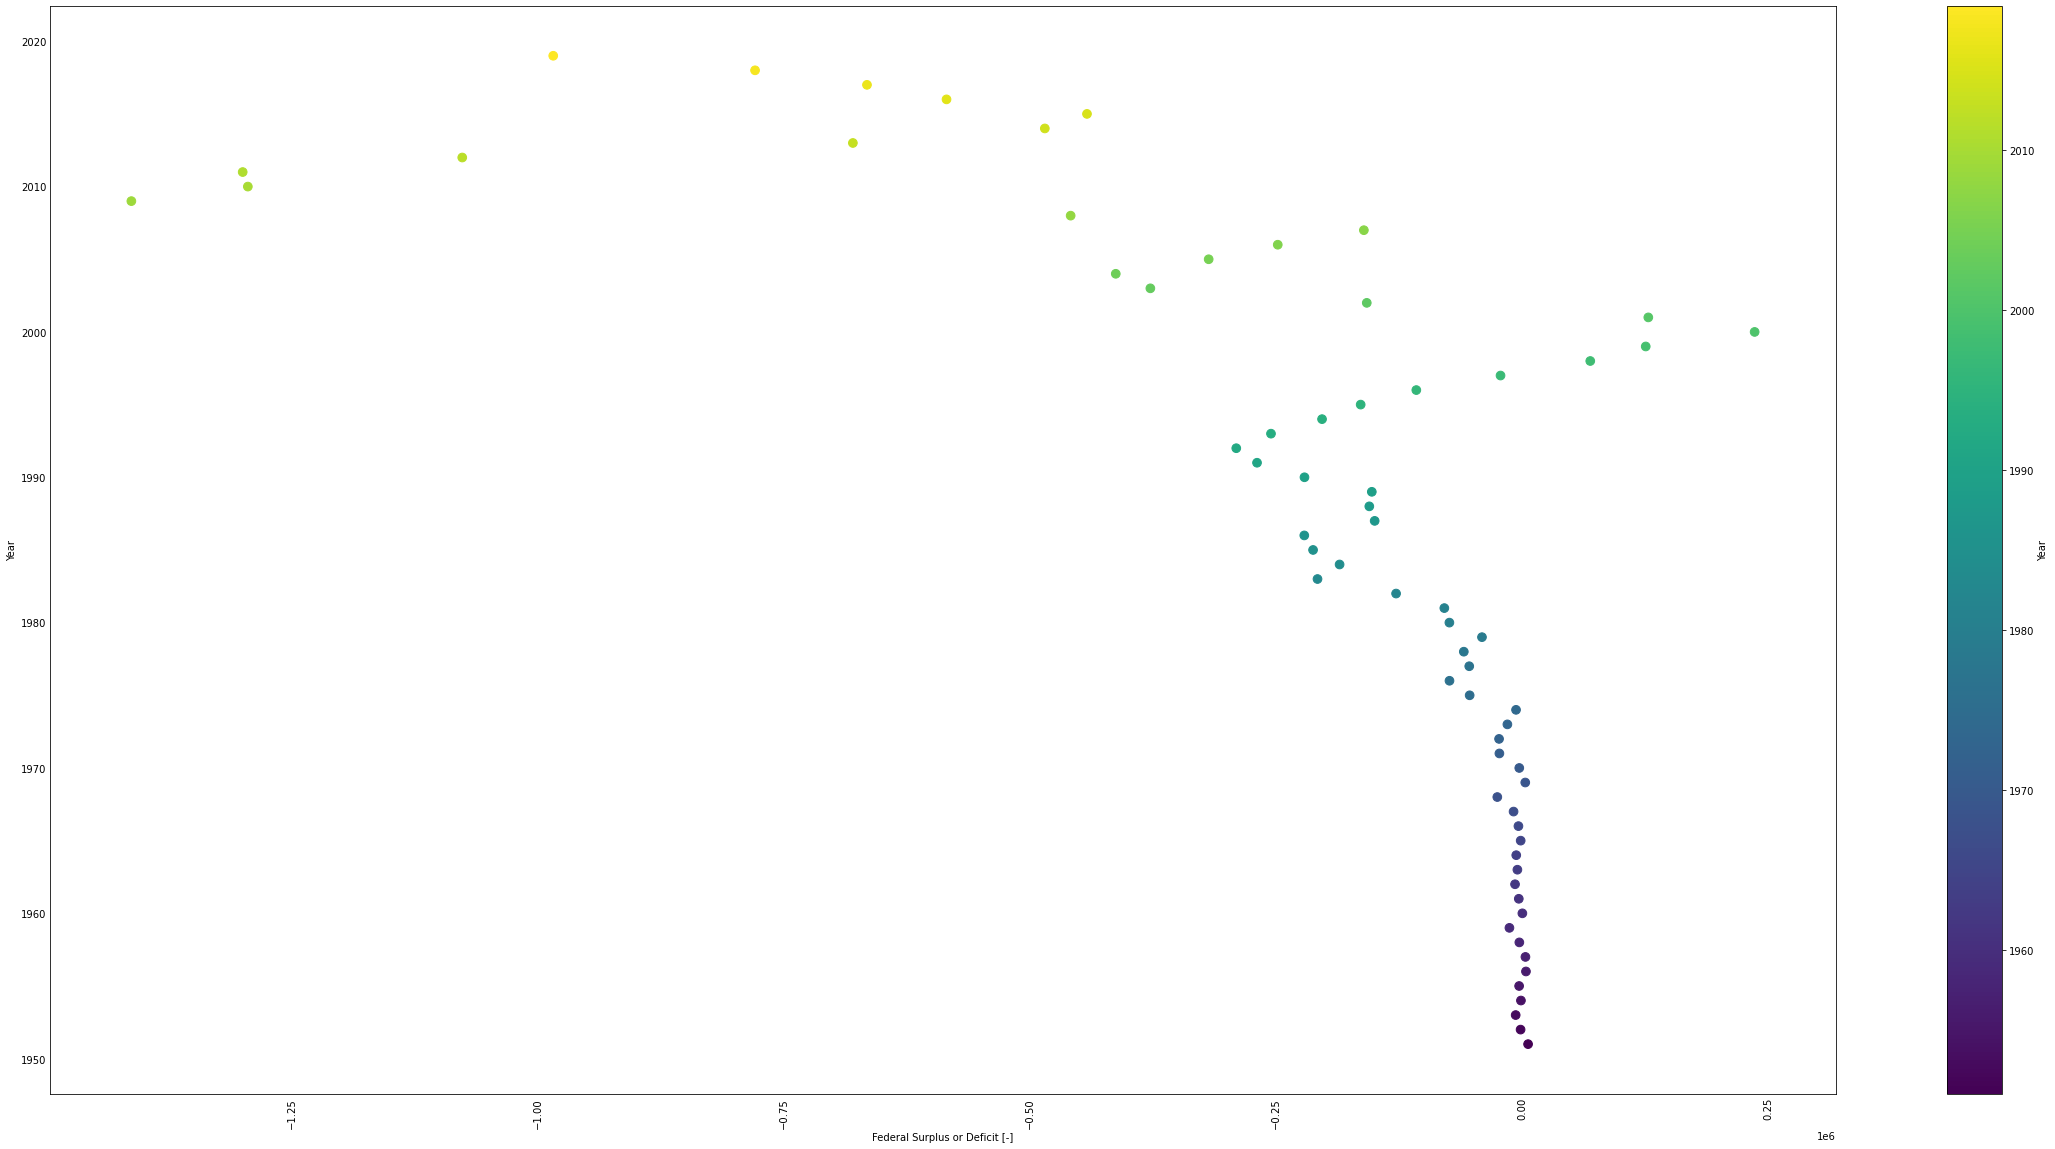

In [5]:
scatter_vars = ["Gross Domestic Product", "Federal Debt: Total Public Debt as Percent of Gross Domestic Product", "Federal Surplus or Deficit [-]"]
plot_ts_scatter(data[scatter_vars])

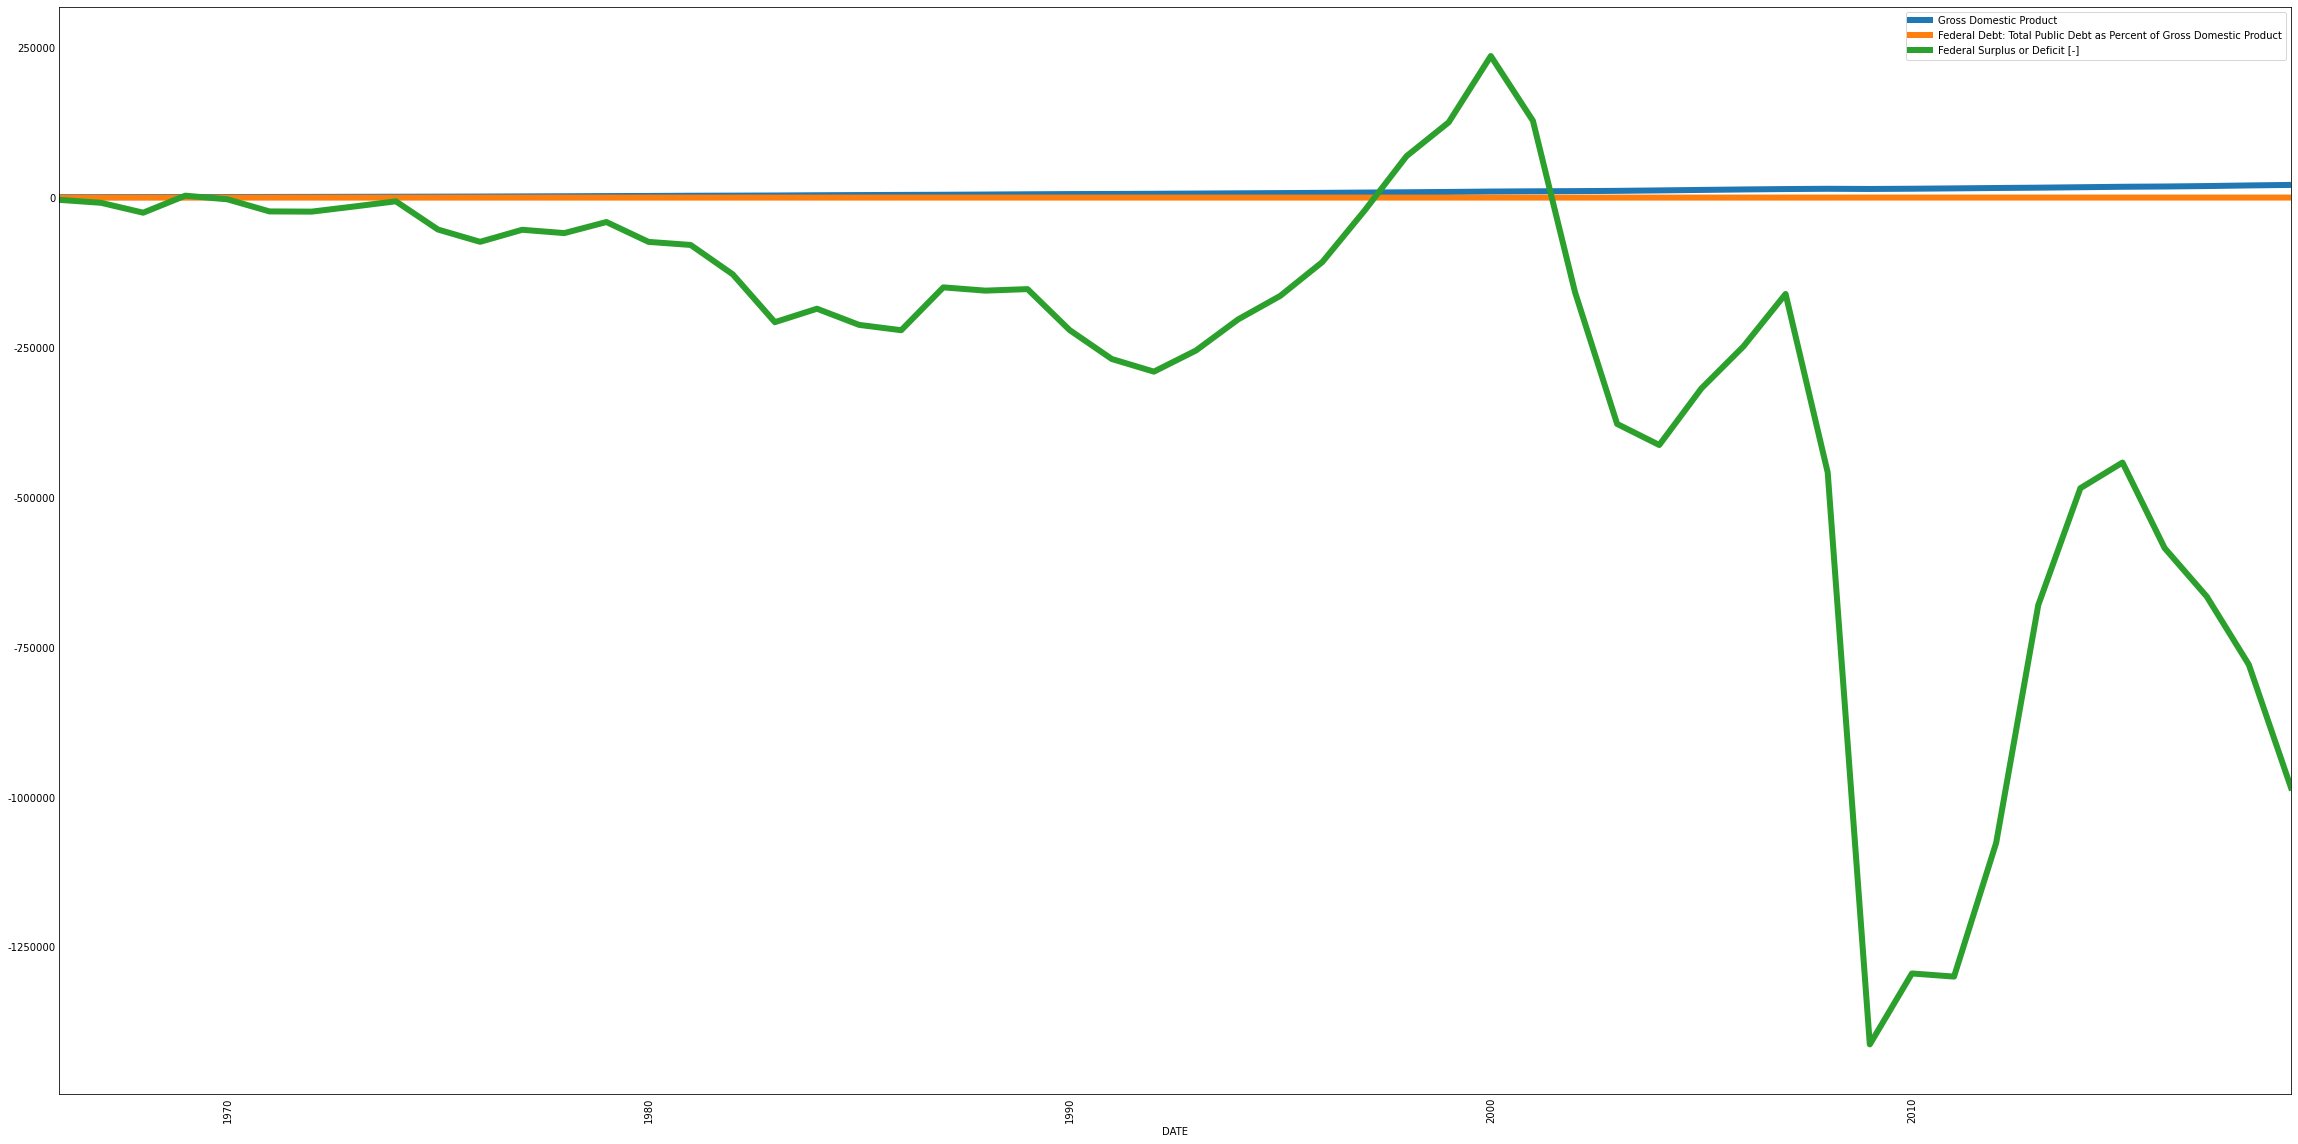

In [8]:
interest_vars = ["Gross Domestic Product", "Federal Debt: Total Public Debt as Percent of Gross Domestic Product", "Federal Surplus or Deficit [-]"]
plot_lines(data[interest_vars], linewidth = 6)

hw part 2